# Feature engineering
## 02 Feature engineering - Introduction

We will now learn about **feature engineering** which is the process of building new features from existing ones. There are many different ways to extend the set of features, and we will start by discussing **polynomial features** which is at the basis of **polynomial regressions**. We will then present other feature engineering techniques and illustrate **logarithmic transformations** with the Boston housing dataset.

### Polyfit revisited

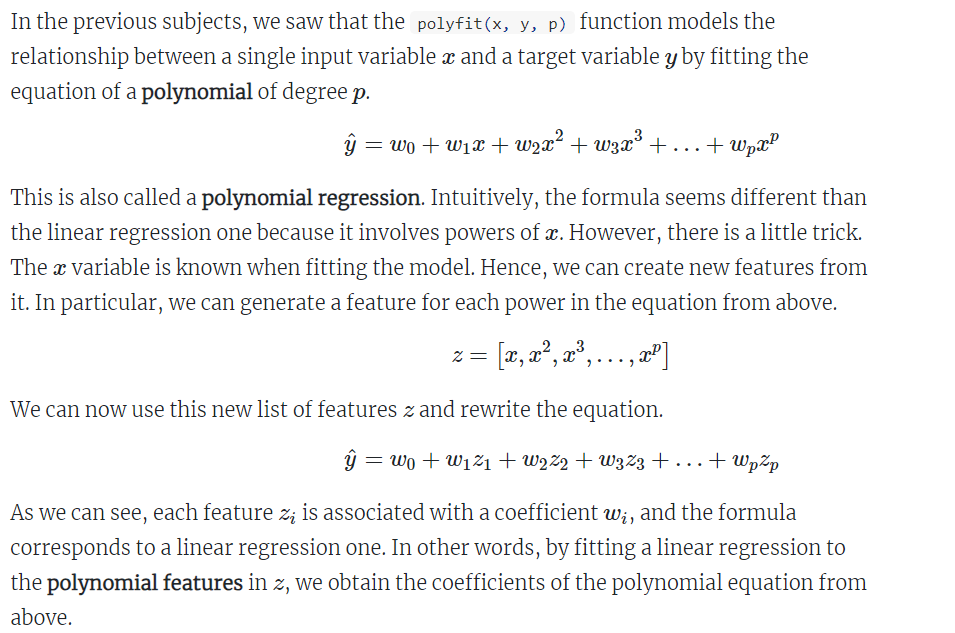

### Augmenting the input

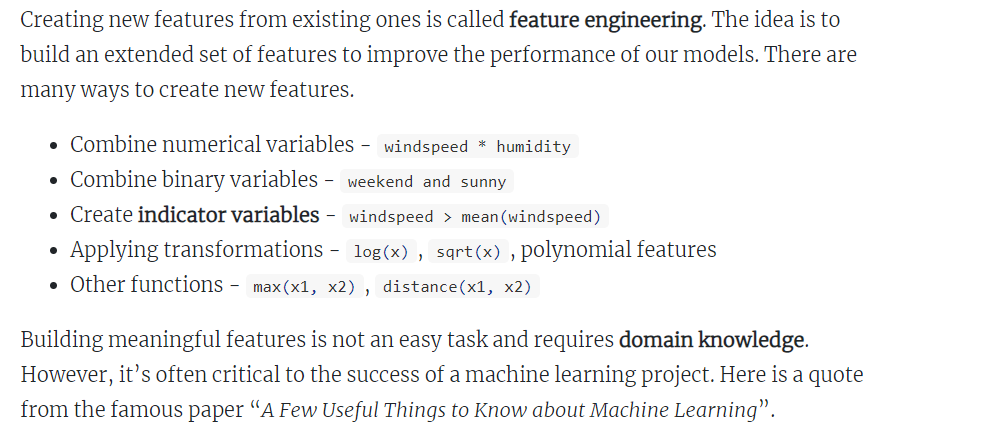

> **Note**: 
“At the end of the day, some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used. If you have many independent features that each correlate well with the class, learning is easy. On the other hand, if the class is a very complex function of the features, you may not be able to learn it. Often, the raw data is not in a form that is amenable to learning, but you can construct features from it that are. This is typically where most of the effort in a machine learning project goes. It is often also one of the most interesting parts, where intuition, creativity and “black art” are as important as the technical stuff.” - Pedro Domingos

*Source: Pedro Domingos, point 8 of “A Few Useful Things to Know about Machine Learning” - [google scholar page](https://scholar.google.ch/scholar?cluster=4404716649035182981&hl=en&as_sdt=0,5)*

### Boston housing dataset

In practice, we often apply **logarithmic transformations** to one or more features in the dataset. Let’s take the [Boston housing](https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Boston.html) dataset example.

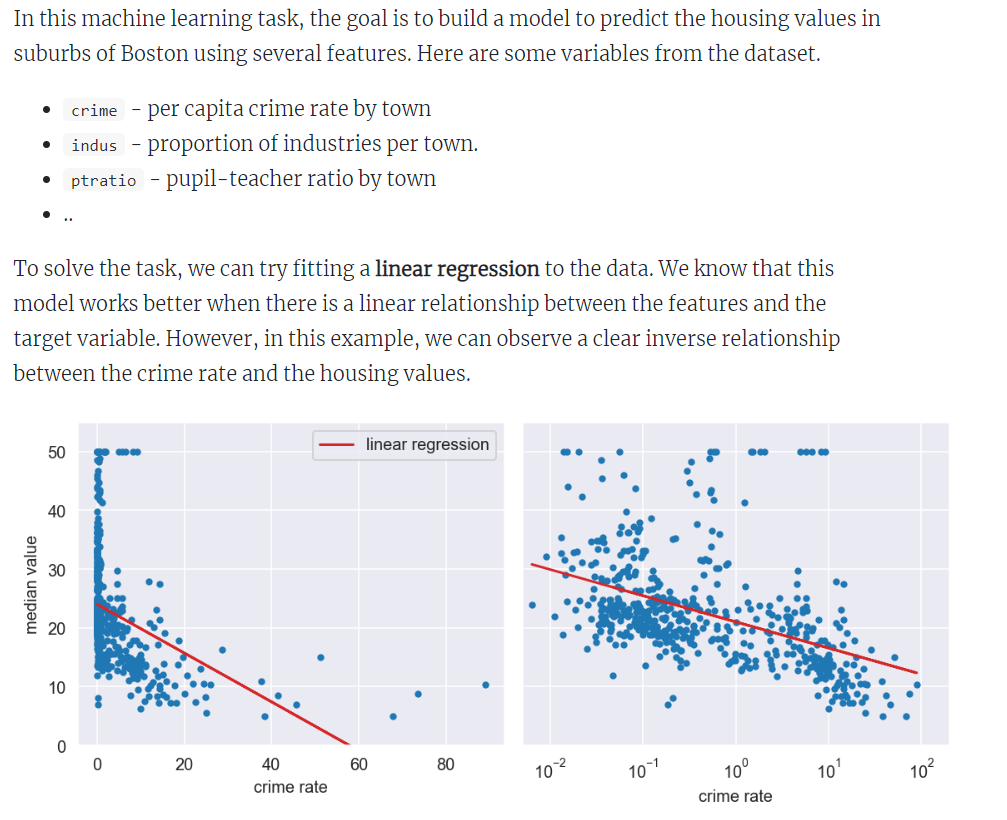

Most of the data points have a small crime rate, and very few have a large one. However, we can use a **logarithmic scale** to redistribute the values. The two plots from above compare two simple linear regressions in red. One with the raw values, and the other with the transformed crime rates.

In general, we usually apply the logarithmic function to features that have a **skewed distribution**. We can detect these variables using histograms.

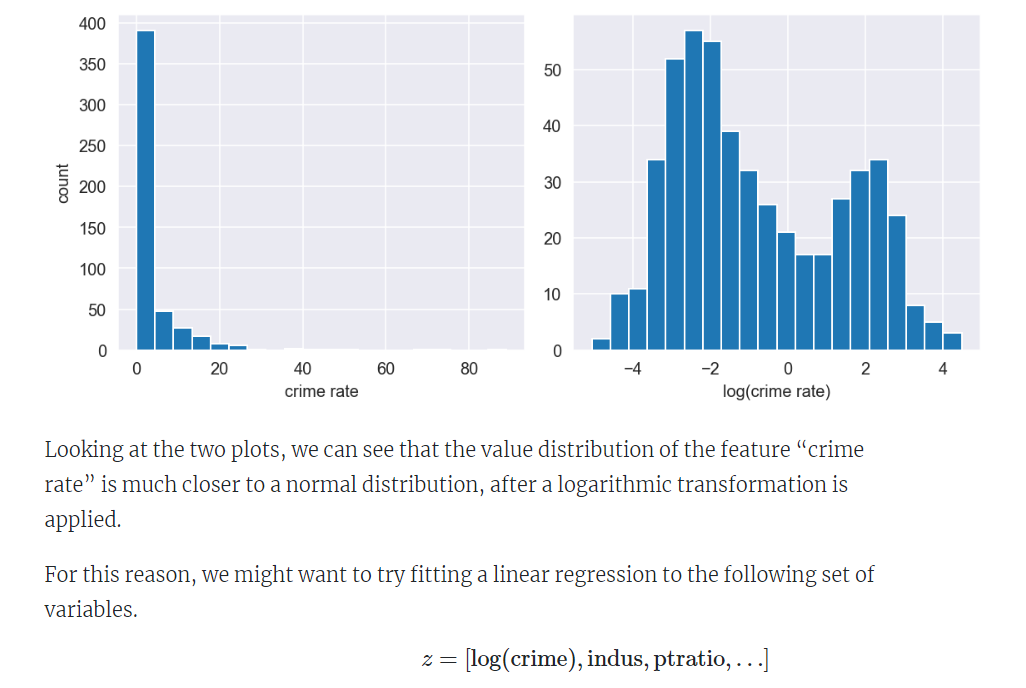

### Summary

In this unit, we saw the basic idea behind **feature engineering**. Here are a few takeaways.

- Feature engineering is the process of building new features from existing ones.
- The polyfit() function fits a linear regression to a set of **polynomial features**.
- Applying the **logarithmic transformation** to variables with a skewed distribution can help.

In the next unit, we will implement polynomial regressions using Scikit-learn.

## 03 Adding polynomial features

In the last unit, we learned about **feature engineering** and saw that a polynomial regression corresponds to a linear regression fitted to **polynomial features**.

We will now see how to implement polynomial regressions with Scikit-learn. This time, we will use the **electric car consumption** dataset.

### Electric car consumption 

The electric car consumption dataset contains 57 measurements of the **energy consumption**, by miles, of an electric car in different temperature settings. The dataset is inspired by [this study](https://scholar.google.ch/scholar?cluster=17843505433175425124&hl=en&as_sdt=0,5) which analyzed the effect of temperatures on the efficiency, range and emissions of electric vehicles in different regions of the United States.

Let’s start by loading the dataset.


In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv("Ressources/c3_electric-cars.csv")

# Print shape
print("Shape:", data_df.shape)

Shape: (57, 2)


In [2]:
# First five rows
data_df.head()

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


In this unit, we will build a model to predict energy consumption using temperatures.

Let’s create and plot the x, y variables. Note that in this unit we work only with the training set and for simplicity we use the names x, y instead of x_tr, y_tr.

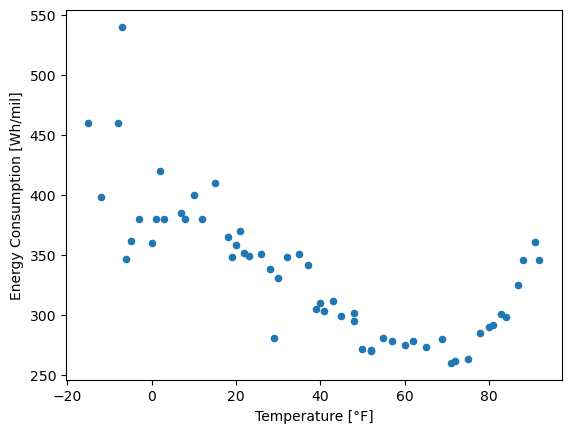

In [3]:
# Extract x, y data
x = data_df.iloc[:, 0].values  # Temperatures
y = data_df.iloc[:, 1].values  # Consumption

# Plot data
%matplotlib inline
import matplotlib.pyplot as plt

data_df.plot.scatter("Temperature [°F]", "Energy Consumption [Wh/mil]")
plt.show()

As you can see, electric cars consume more energy during cold weather. The optimal consumption is around 70°F (21°C) and then increases with warmer temperatures.

We can use a **polynomial** to model the relationship between the two variables. Let’s see how to do that with Scikit-learn.

### Create the polynomial features

Scikit-learn implements a PolynomialFeatures object to build the polynomial features. Note that it’s considered as a **preprocessing step** because it’s done before fitting the model.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In the Scikit-learn jargon, this object is a **preprocessor** which means that it implements the fit() and transform() functions.

Here is the code to create the **polynomial features** that correspond to a polynomial of degree 2.

In [5]:
import numpy as np

# Create the object
pf_obj = PolynomialFeatures(degree=2)

# Create the polynomial features
X2 = pf_obj.fit_transform(
    # Pass two dimensional array
    x[:, np.newaxis]  # (57,) -> (57,1)
)

print("Shape:", X2.shape)


Shape: (57, 3)


We start by creating the PolynomialFeatures object and set its degree with the degree parameter. Then, we obtain the features by passing the input data to its fit_transform() function which is a shortcut for the fit() and transform() ones.

In [6]:
# Fit the preprocessor
pf_obj.fit(x[:, np.newaxis])

# Create the polynomial features
X2 = pf_obj.transform((x[:, np.newaxis]))

In this code, fit() computes the number of output features and transform() creates them. Again, Scikit-learn works with **2-dimensional** Numpy arrays, and we need to add a dimension to x using the x[:, np.newaxis] syntax.

Scikit-learn labels each new feature in X2, and we can obtain these labels with the get_feature_names_out() function.

In [10]:
# Get feature names
feature_names = pf_obj.get_feature_names_out()

print("Features:", feature_names)

Features: ['1' 'x0' 'x0^2']


Here, x0 denotes temperatures. As we can see, Scikit-learn adds a 1 to the polynomial features which corresponds to the intercept term. However, we will use the LinearRegression object which already fits one. Hence, this new feature is not necessary and we can remove it by setting the include_bias parameter to False.

In [13]:
# Create the object
pf_obj = PolynomialFeatures(degree=2, include_bias=False)

# Create the polynomial features
X2 = pf_obj.fit_transform(x[:, np.newaxis])

# Get feature names
feature_names = pf_obj.get_feature_names_out()

print("Features:", feature_names)

Features: ['x0' 'x0^2']


It’s also possible to create the new set of features manually with the Numpy c_ object.

In [14]:
# Create the polynomial features manually
X2 = np.c_[x, x ** 2]

### Fit a linear regression 
Let’s fit a linear regression to the new set of features.

In [15]:
from sklearn.linear_model import LinearRegression

# Create linear regression
linreg = LinearRegression()

# Fit it
linreg.fit(X2, y)

LinearRegression()

We can now plot the model by generating a hundred sample data points.

In [17]:
# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(min(x), max(x), num=100)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])

Note that we need to create the polynomial features for these x_values with the transform() function. Again, you can also use the Numpy c_ object.

In [18]:
X_values2 = np.c_[x_values, x_values ** 2]

We can now compute and plot the predictions for these sample points.

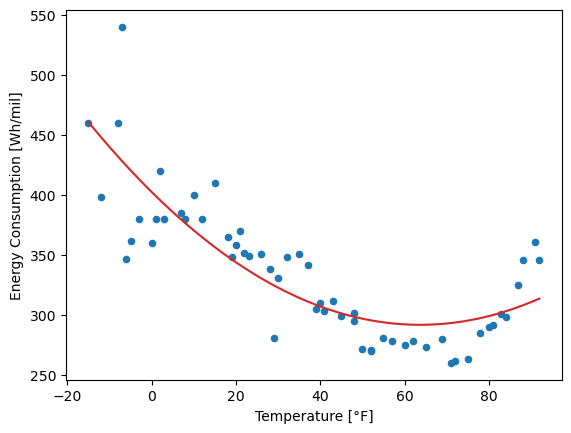

In [19]:
# Compute predictions
y_values = linreg.predict(X_values2)

# Plot predictions
data_df.plot.scatter("Temperature [°F]", "Energy Consumption [Wh/mil]")
plt.plot(x_values, y_values, color="C3")
plt.show()

The model captures the main trend but doesn’t fit well the data. You can try to increase the degree of the set of polynomial features. We leave it to you as an exercise. Here is the result for degrees 3, 5 and 10.

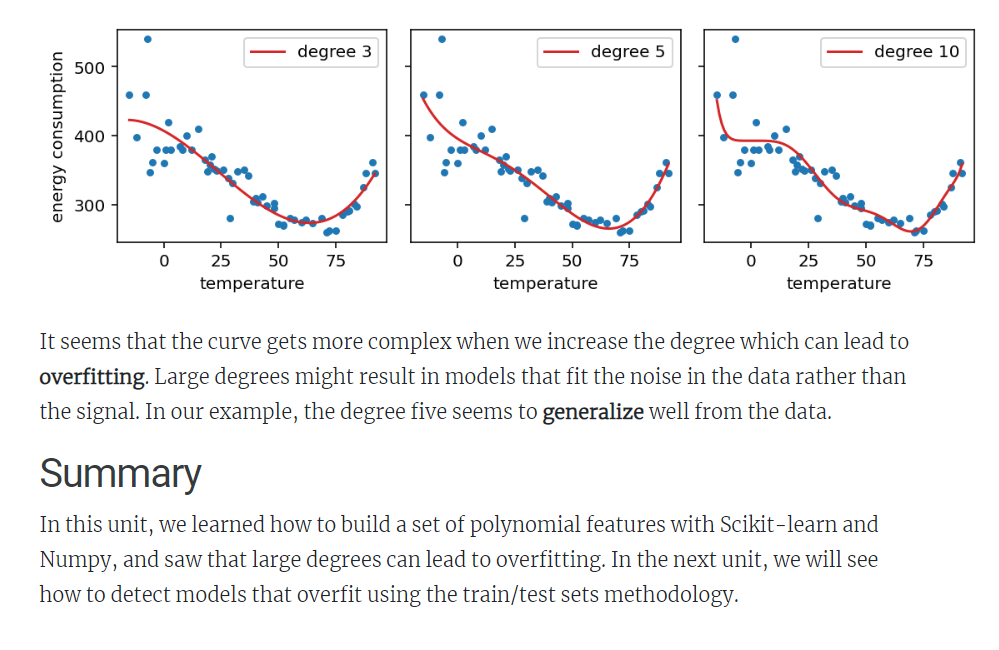

## 04 Detect models that overfit

In the last unit, we saw that it’s easy to build models that **overfit**. A simple way to identify such models is to split the data into **train/test sets**. Let’s see how this works.

### Detect models that overfit

Let’s fit two models to the following set of 18 x/y data points. One is a **simple linear regression** and the other is a **polynomial regression** of degree 9.

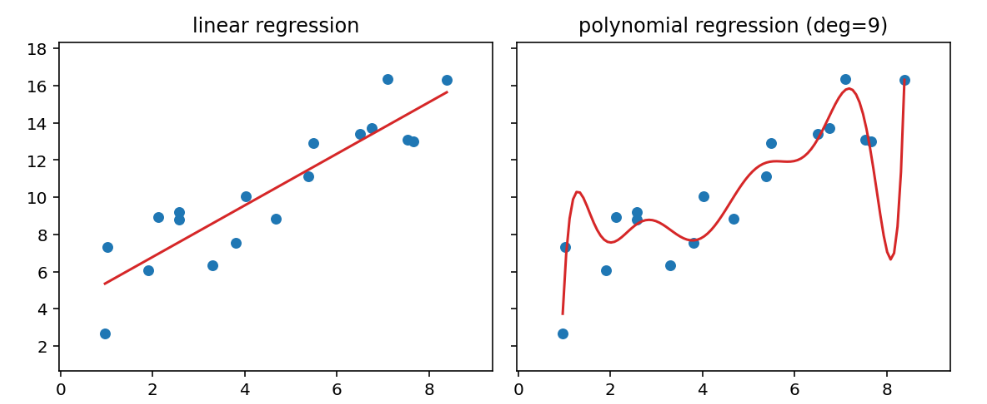

We can see on the plots that the simple line provides a good representation of the overall trend in the data. On the other hand, the complex curve (polynomial with degree 9) goes beyond representing the **true trend** and likely fits the **noise** in the data. In fact, it **overfits** the data. As a result, looking only at error values after fitting the models can be misleading. For instance, here are the MSE scores of these two models.

> MSE polynomial regression: 1.14
MSE linear regression: 2.39

According to these scores, the polynomial fits better the data points than the line. However, the polynomial regression is **overfitting** which means that it fits well the actual data points (train set) but will fail to **generalize** to new data points (unseen data or test set). We show this in the following by splitting the data into two sets.

### Train and test sets

One solution to detect the overfit is to split the data into train and test sets. We learned earlier in this course that we fit our models on **train set** and we evaluate our models on **test set** which represents unseen data points.

In practice, we usually **shuffle the data points** before splitting them because we want to avoid having train/test sets that don’t represent well the data. For our example, we take 10 points for the train set the other 8 for the test set.

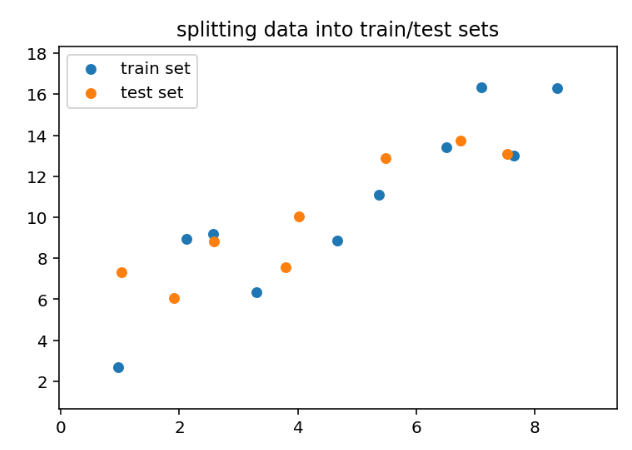

Let’s fit the two models again using the **train set**.

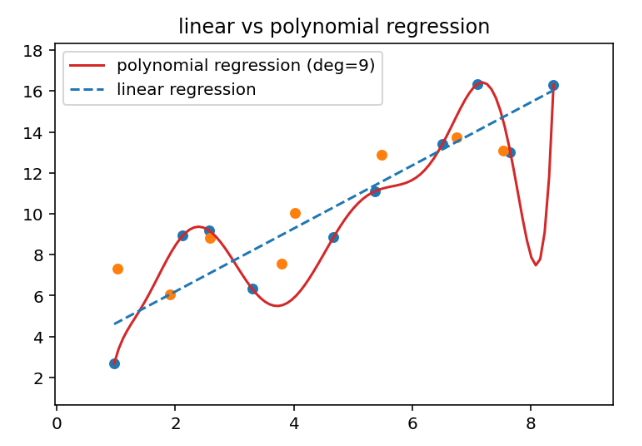

It’s interesting to note that the polynomial passes through each data point from the train set. Hence, its MSE score on this set is zero.

>Train set
MSE polynomial regression: 0.00
MSE linear regression: 2.93

However, if we evaluate the MSE scores for the **test set**, we can see that the polynomial has a larger error than the line. This error is an estimation of the **generalization error**, i.e., the error made on new, unseen data points.

>Test set
MSE polynomial regression: 6.01
MSE linear regression: 2.10

By looking at the differences between the train and the test scores, it’s clear that the polynomial is overfitting. Later in this course we introduce **regularization** that helps to avoid overfitting.

### Summary
Let’s summarize.

- We can detect models that **overfit** by looking at the differences between the error made on the train and the test sets.
- The error on the test set is an estimation of the **generalization error**.

In the next unit, we will work with the electric car consumption data set. We will split the data into train/test sets with Numpy and Scikit-learn, and use them to compare two polynomials of different degrees.


## 05 Splitting data

In this unit, we will see how to split data into **train and test sets** using Numpy and Scikit-learn. We will work with the electric car consumption dataset.

### Splitting data with Numpy
Let’s start by loading the dataset.

In [21]:
import pandas as pd

# Load the data
data_df = pd.read_csv("Ressources/c3_electric-cars.csv")

data_df.head()

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


Our goal is to split these x/y points into a train and a test set. To achieve this, we will generate **two lists of indexes**. One for data points in the train set and the other for data points in the test set.

First, let’s start by creating a list with all the indexes that we can then split into two.

In [22]:
import numpy as np

# Generate a list of indexes
n = len(data_df)
indexes = np.arange(n)

print("indexes:", indexes)

indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]


In this code, we count the number of data points n and generate a list of indexes between 0 and n-1 using the Numpy arange() function.

We can now split this list. For this example, we will do a 70-30 split.

In [23]:
# Split into train/test indexes
split_idx = int(n * 0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

print("train indexes:", train_idx)
print("test indexes:", test_idx)


train indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
test indexes: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]


The idea is to compute the index split_idx at which we need to split the data, and then use it to separate the list of indexes into two. Note that the data is not necessarily separable into 70-30 parts. For this reason, we use the int() Python built-in function to convert n*0.7 into an integer.

Finally, we can separate the x/y data points into train/test sets using the train_idx and test_idx lists.

In [24]:
# Extract x, y data
x = data_df.iloc[:, 0].values  # Temperatures
y = data_df.iloc[:, 1].values  # Consumption

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

print("train:", x_tr.shape, y_tr.shape)
print("test:", x_te.shape, y_te.shape)

train: (39,) (39,)
test: (18,) (18,)


As we can see, there are 39 data points in the train set and 18 in the test one. Let’s plot these two sets.

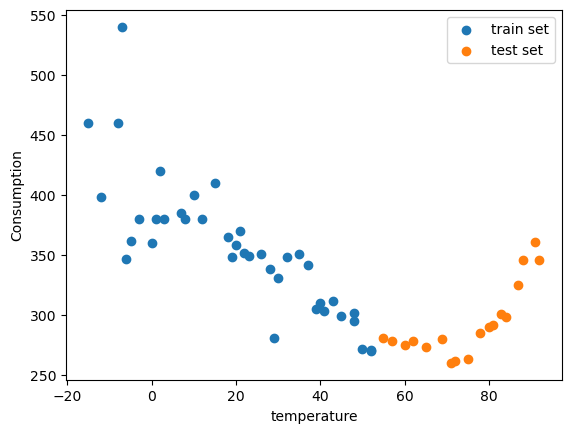

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(x_tr, y_tr, label="train set")
plt.scatter(x_te, y_te, label="test set")
plt.xlabel("temperature")
plt.ylabel("Consumption")
plt.legend()
plt.show()

This is a bad split because neither of the sets represents well the entire data. The issue is that the data points are **ordered** by temperatures in the original .csv file. Hence, when we split the data, the 39 points with the lowest temperatures go into the train set and the remaining 18 into the test set.

### Shuffling the indexes
One solution is to **shuffle the data** before splitting it. In this unit, we will shuffle the list of indexes rather than the data points directly. This has the advantage of leaving the original data unmodified.

To achieve this, we can use the shuffle() function from the Numpy random module.

In [26]:
# shuffle the indexes
np.random.shuffle(indexes)

print("indexes:", indexes)  # result depends on the seed

indexes: [53 32 40 19 18 24 29 11  1 16 22  3  9 45 31  6 30  4 13  2 17 52 25 50
 46  0 44 35 41 38 14 36 33 49 42 27 28 55 34 39 26 21 43 10 37 48 15 20
 51 23 47 12  8  5  7 54 56]


Numpy shuffles the data differently each time we run this code. In fact, it uses a **random number generator** to shuffle the data, and we can fix its results by setting its seed number with the seed() function.

In [27]:
# Create the indexes
indexes = np.arange(n)

# Shuffle the indexes
np.random.seed(0)
np.random.shuffle(indexes)

print("indexes:", indexes)

indexes: [35 34 41 27 11  2 33 56 22 55  4 10 29 50 32 40 37  7 14 31 28 46 51 18
 54 26 15  5 30 16 48 20 49  8 13 25 17 42 45 38  1 12 43 24  6 23 36 21
 19  9 39 52  3  0 53 47 44]


t’s important to understand that each **seed number** generates a different but fixed result. Hence, by setting the seed, we get predictable results. You can take a look at this [StackOverflow answer](https://stackoverflow.com/questions/22639587/random-seed-what-does-it-do/22639752#22639752) to learn more about random number generators.

We can now split the indexes into train/test indexes and then plot them

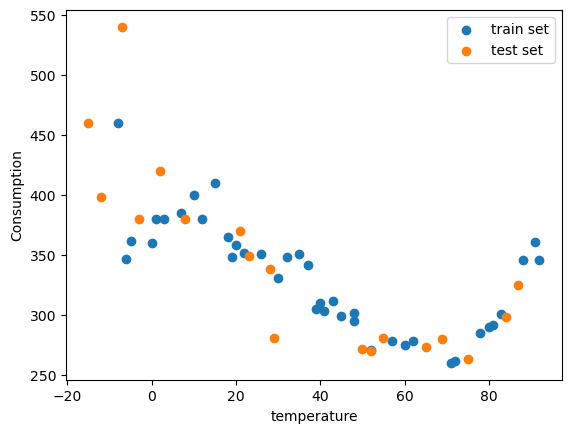

In [28]:
# Split into train/test indexes
split_idx = int(n * 0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

# Plot data points
plt.scatter(x_tr, y_tr, label="train set")
plt.scatter(x_te, y_te, label="test set")
plt.xlabel("temperature")
plt.ylabel("Consumption")
plt.legend()
plt.show()

The two sets are now good samples of the original data.

### With Scikit-learn
Splitting the data is a common operation in machine learning. For this reason, Scikit-learn implements a train_test_split() function in its model_selection module.

In [29]:
from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0
)

The function takes a set of arrays and split them into train/test sets. We can specify the size of each set with the train_size and the test_size parameters, and set the seed with random_state. In this code, the two sizes are percentages of data. But we can also specify the number of points.

In [30]:
from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=39, test_size=18, random_state=0
)

Note that the function also works with two-dimensional arrays and DataFrames. For instance, you will use it in the next exercise to split a dataset with multiple features.

### Model selection
In a previous unit, we fitted a polynomial of degree 5 and another of degree 10 to this dataset. Let’s see which one has a better **generalization error** according to our test set.

We create the two models using the Numpy polyfit() function and evaluate them with the mean_squared_error() function from Scikit-learn.

In [31]:
from sklearn.metrics import mean_squared_error as mse

# Polynomial regressions of degree 5 and 10
coef5 = np.polyfit(x_tr, y_tr, deg=5)
coef10 = np.polyfit(x_tr, y_tr, deg=10)

# Evaluate performance
y_pred5_tr = np.polyval(coef5, x_tr)
y_pred5_te = np.polyval(coef5, x_te)

print(
    "Degree 5 MSE: {:.0f} (train) vs {:.0f} (test)".format(
        mse(y_tr, y_pred5_tr), mse(y_te, y_pred5_te)
    )
)
# Degree 5 MSE: 719 (train) vs 651 (test)

y_pred10_tr = np.polyval(coef10, x_tr)
y_pred10_te = np.polyval(coef10, x_te)

print(
    "Degree 10 MSE: {:.0f} (train) vs {:.0f} (test)".format(
        mse(y_tr, y_pred10_tr), mse(y_te, y_pred10_te)
    )
)

Degree 5 MSE: 719 (train) vs 651 (test)
Degree 10 MSE: 707 (train) vs 1218 (test)


We can see that the polynomial of degree 10 has a better training error than the polynomial of degree 5. However, its test score nearly doubles which means that it’s likely **overfitting**. On the other hand, the polynomial of degree 5 seems to generalize well from the data with a test score close to its train score.

>**Tips and Tricks**: Note that in practice we don’t use the **test data** to decide about the degree of the polynomial. Instead, we can hold out some of the training data as the **validation data** and use it to decide which degree of the polynomial leads to the best prediction. We can consider the degree of the polynomial as a **hyperparameter** and tune it using the validation data. We will discuss hyperparameter tuning in the next subject.

### A note on sample split for time series data
Splitting time series data should be done with extra care. In time series modeling and prediction, the objective is often to use data from the past to predict a future value. A particularity of time series data is that strength of the relation between the predictors and the target can vary significantly over time for some phenomena. For instance, nowadays, a company’s stock price is much more sensitive to its carbon footprint than in the past. Therefore, a model cannot capture such sensitivity from a train set that contains only the past data. To mitigate this issue we can think of several splitting schemes.

Suppose that we have daily data from 2010 to 2020. A simple scenario is to split the data into a train set that starts from 2010 and ends in 2015, and a test set from 2016 to 2020 (see the image below). This method requires doing the training and testing only once and is simple to implement. However, if there are major changes in the data during the test period, the test data will be significantly different from the train data. Therefore, a model that is trained on the train data will not return a good prediction on the test data. This weakness can be addressed by using rolling windows or expanding windows as described in the following two scenarios.

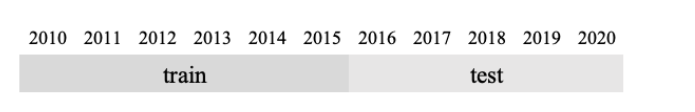

**Scenario 1:** in this scenario the train and test split is performed multiple times using rolling windows. That is, by shifting the windows forward the most recent data points come into play whereas the oldest data points are excluded from the windows. For instance, the first train set can start from 2010 to 2015 followed by the test set of 2016 (see the image below). The second split leads to a train set from 2011 to 2016 followed by a test set of 2017. In the last split, the train set is from 2014 to 2019 and is followed by a test set of 2020. By training and testing our model on each split, we will have 5 test scores and the final score can be calculated by taking the average or median of these scores.

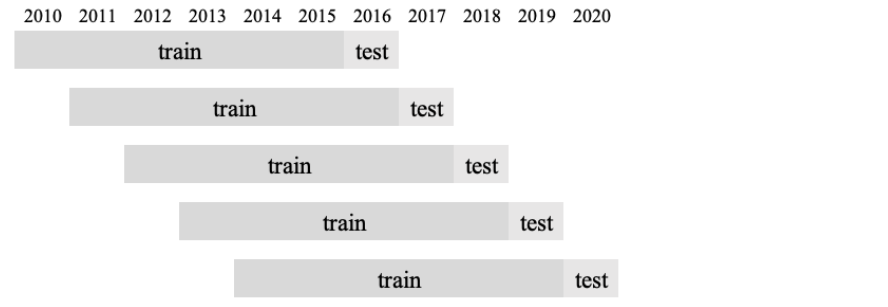

**Scenario 2:** this case is similar to the scenario with rolling windows, except that the start of the training set is fixed and the windows can only expand for each split (see the image below). An advantage of this method is that the earlier data points will remain in the training set, and the model will be also trained on them. However, a disadvantage of this method is that it can be computationally intensive for big data sets.

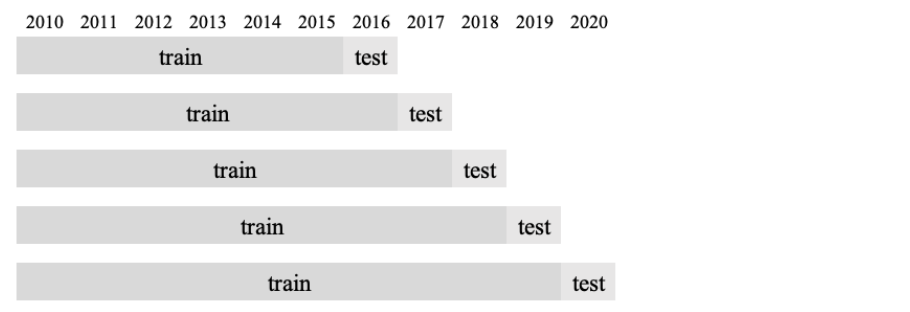

Note that our choice of 1-year increment here is arbitrary and can be different depending on the granularity of the data and machine learning project that we intend to do. Moreover, the choice of these two scenarios over the single split scheme can depend on the domain of analysis. For instance, the single split scheme for financial markets which are subject to irregularities and randomness may result in less accurate test scores.

### Summary
In this unit, we saw two different ways to split the data into train/test sets.

- Manually, by separating the data points using a list of indexes.
- With the train_test_split() function from Scikit-learn.

In the next exercise, you will work on an extended version of the bike sharing dataset with additional polynomial features, and you will use this train/test sets methodology to evaluate your models. This extended dataset also contains categorical features. In the next unit, we will see how to preprocess them for linear regressions with **one-hot encoding**.

## 06 One-hot encoding

So far, we worked with variables that are quantitative, e.g., temperatures, wind speed, humidity. But many datasets also have **categorical features**, e.g., the day of the week, season, type of weather. In this unit, we will see how to preprocess these categorical variables using **one-hot encoding**.

This time, we will work with a modified version of the bike sharing dataset with one quantitative and one categorical variable.

### Categorical variables
Let’s start by loading the dataset.


In [32]:
import pandas as pd

# Load the data
data_df = pd.read_csv("Ressources/c3_bike-small.csv")

# First five rows
data_df.head()

,temp,weekday,casual
0,0.344,6,331
1,0.363,0,131
2,0.196,1,120
3,0.200,2,108
4,0.227,3,82


The dataset has three variables. The first one corresponds to temperatures and the second one to the day of the week. Our goal is to predict the number of casual users using these two features.

The weekday variable is categorical and associates each day of the week with a numerical value between 0 and 6. We can get the different values using the value_counts() function from Pandas. The function should return a Pandas Series with the different values and their number of entries.

In [33]:
data_df.weekday.value_counts()

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64

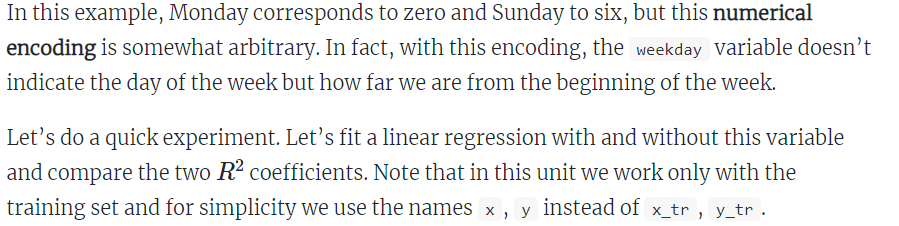

In [34]:
# Create X/y data
X = data_df[["temp"]].values
y = data_df.casual.values

# Fit a linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.29525001840042764

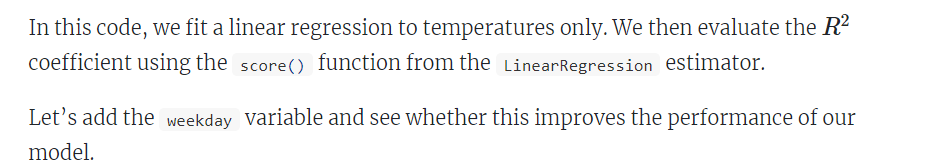

In [35]:
# Create X/y data
X = data_df[["temp", "weekday"]].values
y = data_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.2988588081409286

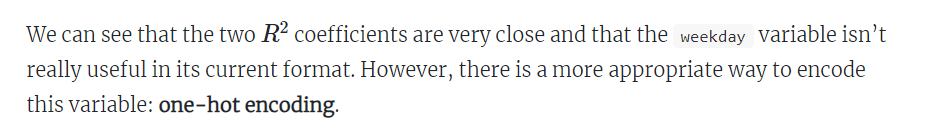

### One-hot encoding
The idea is to create a new variable for each possible value. In our example, we create a variable for each day of the week which indicates whether the measurement was made that day. It’s called **one-hot encoding** because only one variable from the seven can be positive at a time. These indicators are also called **dummy variables**.

Pandas implements a get_dummies() function to create the dummies. We pass the DataFrame and specify which columns are categorical with the columns parameter. The code should return the first five rows of the DataFrame with the dummy variables.

In [36]:
pd.get_dummies(data_df, columns=["weekday"]).head()

,temp,casual,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,331,0,0,0,0,0,0,1
1,0.363,131,1,0,0,0,0,0,0
2,0.196,120,0,1,0,0,0,0,0
3,0.200,108,0,0,1,0,0,0,0
4,0.227,82,0,0,0,1,0,0,0


As you can see, the weekday variable is replaced with seven dummies named after the categorical variable and the value.

We can now fit a linear regression using this new encoding.



In [37]:
# One-hot encoding
encoded_df = pd.get_dummies(data_df, columns=["weekday"])

# Create X/y data
X = encoded_df.drop(["casual"], axis=1).values
y = encoded_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.5969174988134782

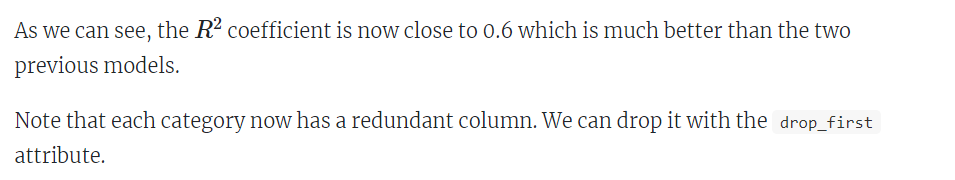

In [38]:
# One-hot encoding
encoded_df = pd.get_dummies(data_df, columns=["weekday"], drop_first=True)
encoded_df.head()

,temp,casual,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,331,0,0,0,0,0,1
1,0.363,131,0,0,0,0,0,0
2,0.196,120,1,0,0,0,0,0
3,0.200,108,0,1,0,0,0,0
4,0.227,82,0,0,1,0,0,0


Let’s verify that we didn’t loose in performance.

In [39]:
# Create X/y data
X = encoded_df.drop(["casual"], axis=1).values
y = encoded_df.casual.values

# Fit a linear regression
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.5969174988134782

### Summary

In this unit, we learned about **one-hot encoding** and saw how to encode categorical variables with the Pandas library. Note that one-hot encoding is considered as a **preprocessing step** and not as being part of the feature engineering process.

In the next exercise, you will experiment with one-hot encoding and feature engineering using an extended version of the bike sharing dataset with categorical features.

## 07 Exercise - Bike sharing polynomial features

The goal of this exercise is to experiment with feature engineering, data splitting, and one-hot encoding.

### Data description

You are going to work with the bike sharing dataset from the previous exercise with three additional features.

- weekday - day of the week
- season - season of the year
- weathersit - type of weather

These are all categorical features, and you will have to encode them using **one-hot encoding** before applying linear regressions. Read the “attribute information” section from the dataset web page to learn about these three features and their possible values.

>**Note**: 
The dataset from this exercise can create numerical issues due to the ill-conditioning problem that we discussed a few subjects before. The implementation from the LinearRegression object should be able to handle it, but can also fail depending on the machine. In that case, you will quickly notice this as the model won’t be able to return reasonable predictions ex. MAE scores and model coefficients in the 10^10 order of magnitude or above (!)

>As we discussed in the unit about collinearity, using regularization solves this numerical instability issue while keeping the information in the columns intact i.e. we don’t want to drop any column and lose information. We will learn more about it in the next subject, but in short, the Ridge regression model is a variant of the linear regression one with this regularization mechanism to keep the model coefficients as small as possible and thus avoid numerical instabilities. How much “regularization” is applied to the model depends on a regularization strength parameter called alpha which we usually tune to optimize the model performance. We won’t go into the details now of how to tune it but setting this alpha to a small value such as 10^−4 should stabilize the ill-conditioning issue while returning results that are very close or identical to the linear regression model.

>For this reason, feel free to use the Ridge object instead of the LinearRegression one. This object follows the usual fit/score/predict syntax from Scikit-learn

>>from sklearn.linear_model import Ridge

>>ridge = Ridge(alpha=1e-4)

>>ridge.fit(X_tr, y_tr)

>>y_pred = ridge.predict(X_te)


**Go to c3_exercise_bike_sharing_polunomial_features notebook**